In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import pandas_profiling as pp
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import datetime as datetime
import warnings 
warnings.filterwarnings('ignore')
df=pd.read_csv('D:/Data Analysis/OTT/disney_plus_titles.csv')
pd.set_option('display.max_columns',None)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [198]:
df.shape

(1450, 12)

In [199]:
df.size

17400

In [200]:
df.dtypes.value_counts()

object    11
int64      1
dtype: int64

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [202]:
df.describe()

,release_year
count,1450.000000
mean,2003.091724
std,21.860162
min,1928.000000
25%,1999.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


In [203]:
for i in range(len(df.isna().sum())):
    if df.isna().sum()[i]>0:
        print('Total number of missing values in '+df.isna().sum().index[i]+":",df.isna().sum()[i])

Total number of missing values in director: 473
Total number of missing values in cast: 190
Total number of missing values in country: 219
Total number of missing values in date_added: 3
Total number of missing values in rating: 3


In [204]:
df['director'].fillna('unknown',inplace=True)
df['cast'].fillna('unknown',inplace=True)
df['country'].fillna('unknown',inplace=True)
df['date_added'].fillna(df['date_added'].mode()[0],inplace=True)
df['rating'].fillna(df['rating'].mode()[0],inplace=True)
df.drop_duplicates(inplace= True)
df.dropna(inplace=True)

In [205]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [206]:
df.drop(['show_id'],axis=1).head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",unknown,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",unknown,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",unknown,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,TV Show,The Beatles: Get Back,unknown,"John Lennon, Paul McCartney, George Harrison, ...",unknown,"November 25, 2021",2021,TV-G,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [207]:
type_count=df['type'].value_counts()
type_count

Movie      1052
TV Show     398
Name: type, dtype: int64

In [208]:
df=df.rename(columns={'listed_in':'category'})

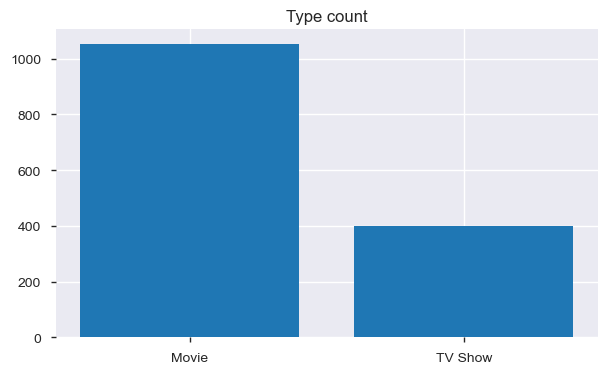

In [209]:
plt.figure(figsize=(7,4))
plt.bar(type_count.index,type_count.values)
plt.title('Type count')
plt.show()

We can infer that the number of movies are greater than the number of tv shows in Disney platform

In [210]:
dis_rating=df['rating'].dropna().unique()
print(dis_rating)

['TV-G' 'PG' 'TV-PG' 'PG-13' 'TV-14' 'G' 'TV-Y7' 'TV-Y' 'TV-Y7-FV']


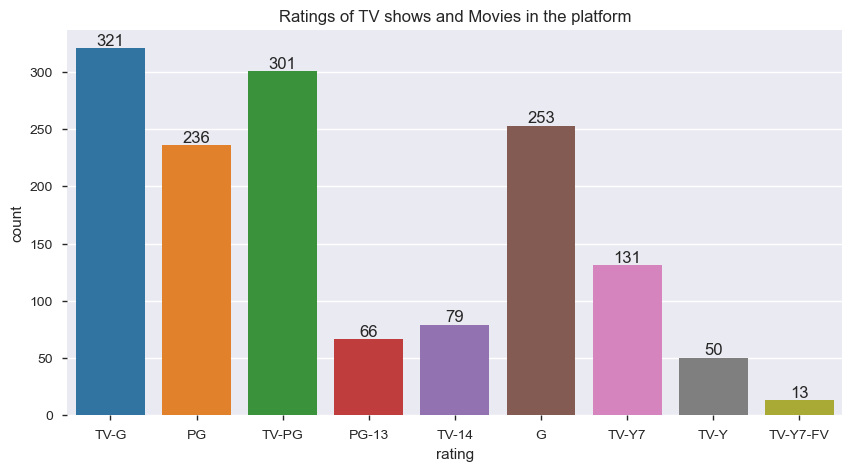

In [211]:
plt.figure(figsize=(10,5))
plt.title('Ratings of TV shows and Movies in the platform')
c=sns.countplot(data=df,x='rating')
c.bar_label(c.containers[0],size=12)
plt.show()

From the above plot we can infer that
Most of the shows and movies present are suitable for all ages.

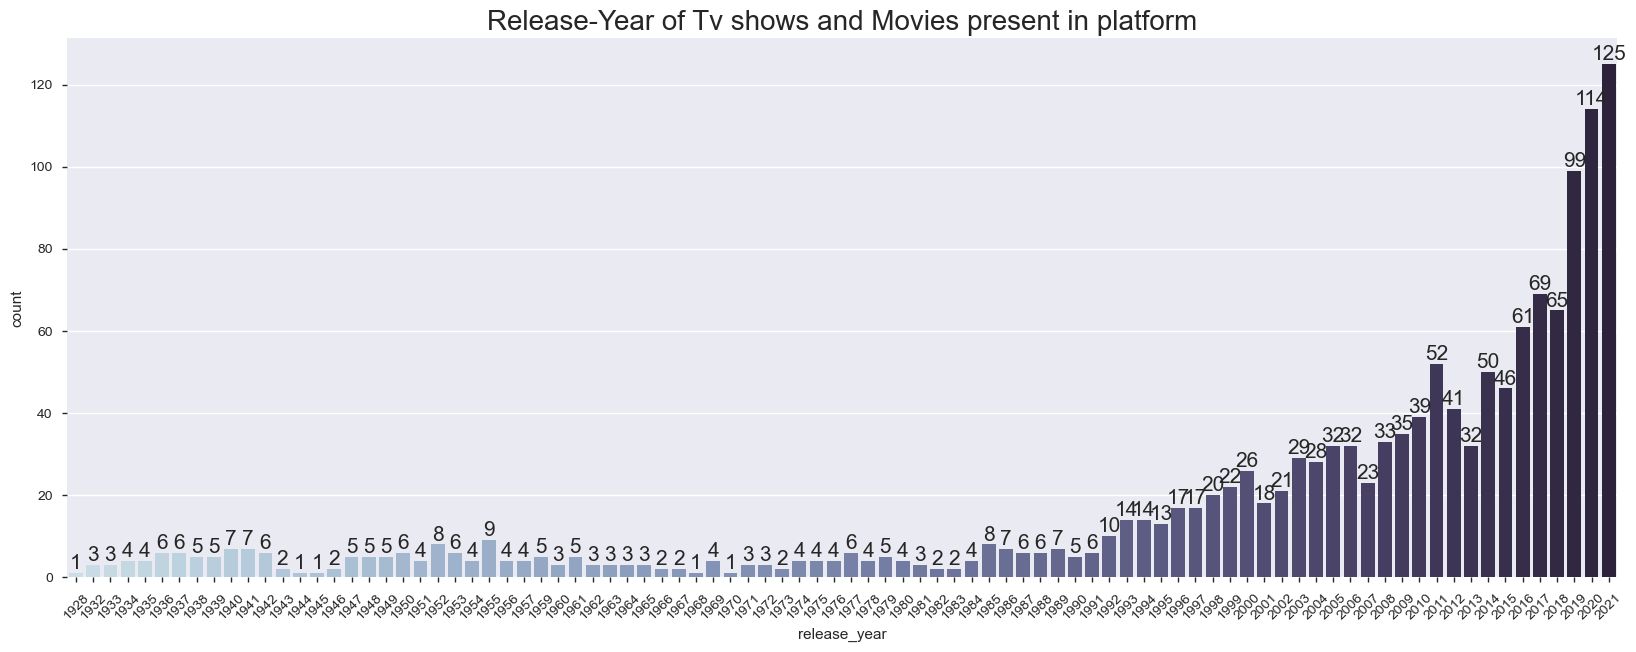

In [212]:
plt.figure(figsize=(20,7))
plt.title('Release-Year of Tv shows and Movies present in platform',fontsize=20)
c=sns.countplot(data=df,x='release_year',palette="ch:s=.25,rot=-.25")
c.bar_label(c.containers[0],size=15)
plt.xticks(rotation=45)
plt.show()

From the given plot we found out that there has been a surge of content present in Disney over the past decade(2010-2020)
The amount of content from (1928-1990) is really low in the platform.

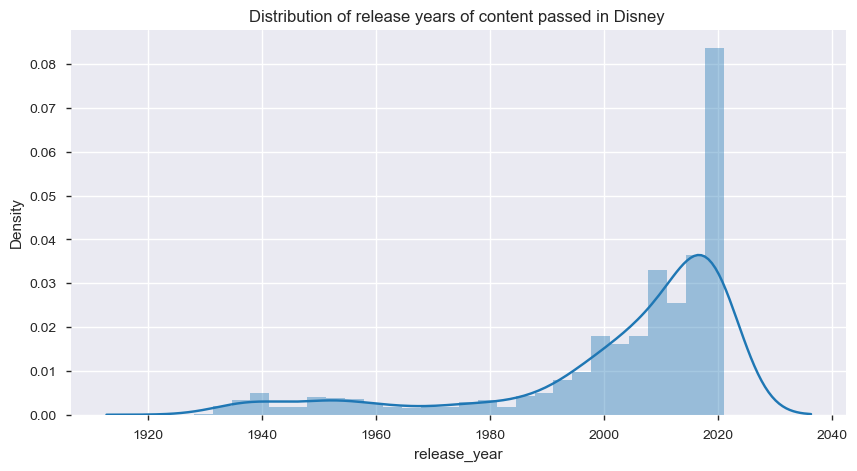

In [213]:
plt.figure(figsize=(10,5))
sns.distplot(df['release_year'])
plt.title('Distribution of release years of content passed in Disney ')
plt.show()

In [214]:
df['date_added']=pd.to_datetime(df['date_added'])
df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added']=df['date_added'].dt.year

In [215]:
data_sub=df.groupby('type')['month_name_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T
data_sub=data_sub.reset_index()
print(data_sub)

type month_name_added  TV Show  Movie
0               April       25     86
1              August       21     50
2            December       13     52
3            February       18     44
4             January       23     61
5                July       35     85
6                June       22     52
7               March       10     24
8                 May       30     62
9            November      148    812
10            October       22     63
11          September       31     59


Majority of the movies were added leading to the december holiday season.

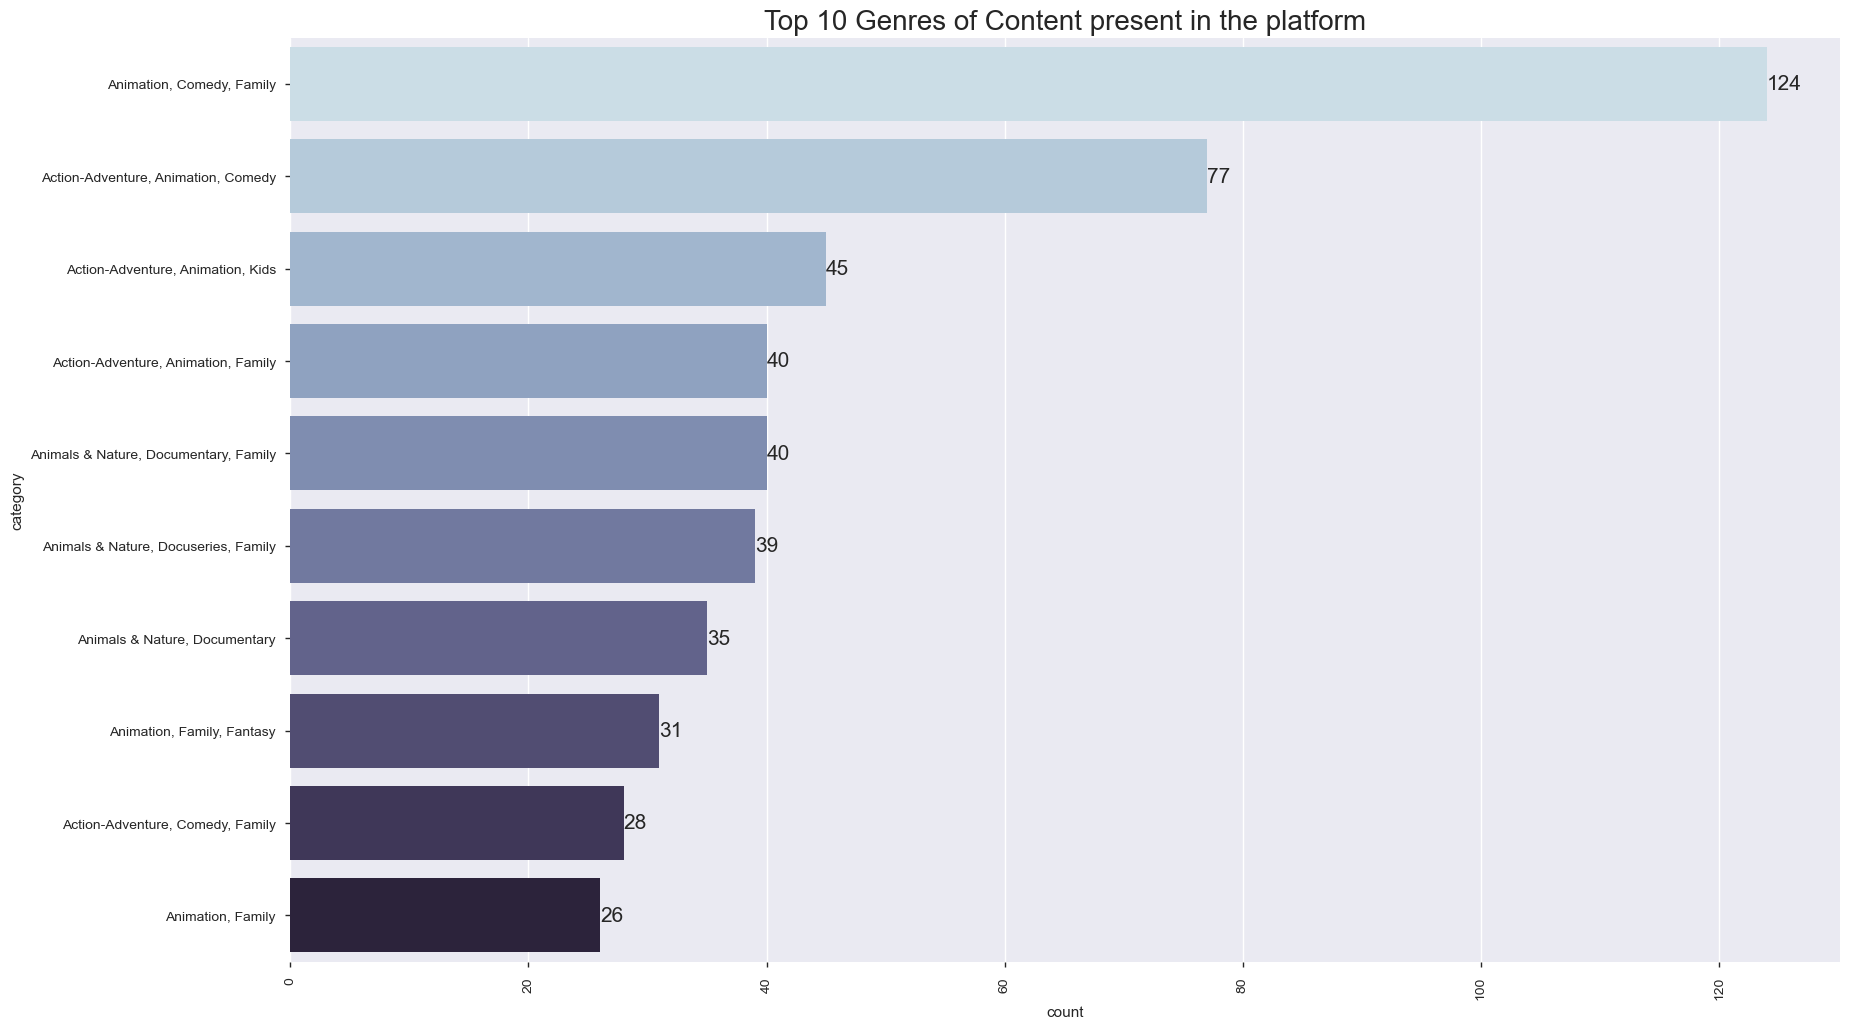

In [216]:
plt.figure(figsize=(20, 12))
plt.title("Top 10 Genres of Content present in the platform",fontsize=20)
c=sns.countplot(y='category',data=df,palette="ch:s=.25,rot=-.25",order=df.category.value_counts().iloc[:10].index)
c.bar_label(c.containers[0],size = 15)
plt.xticks(rotation=90)
plt.show()

The genre present the most in Disney seems to be "Animation,Comedy and Family"
We are also able to infer from the plots that most of the content have been classified into a combination of genre's not boxed into one particular kind of genre

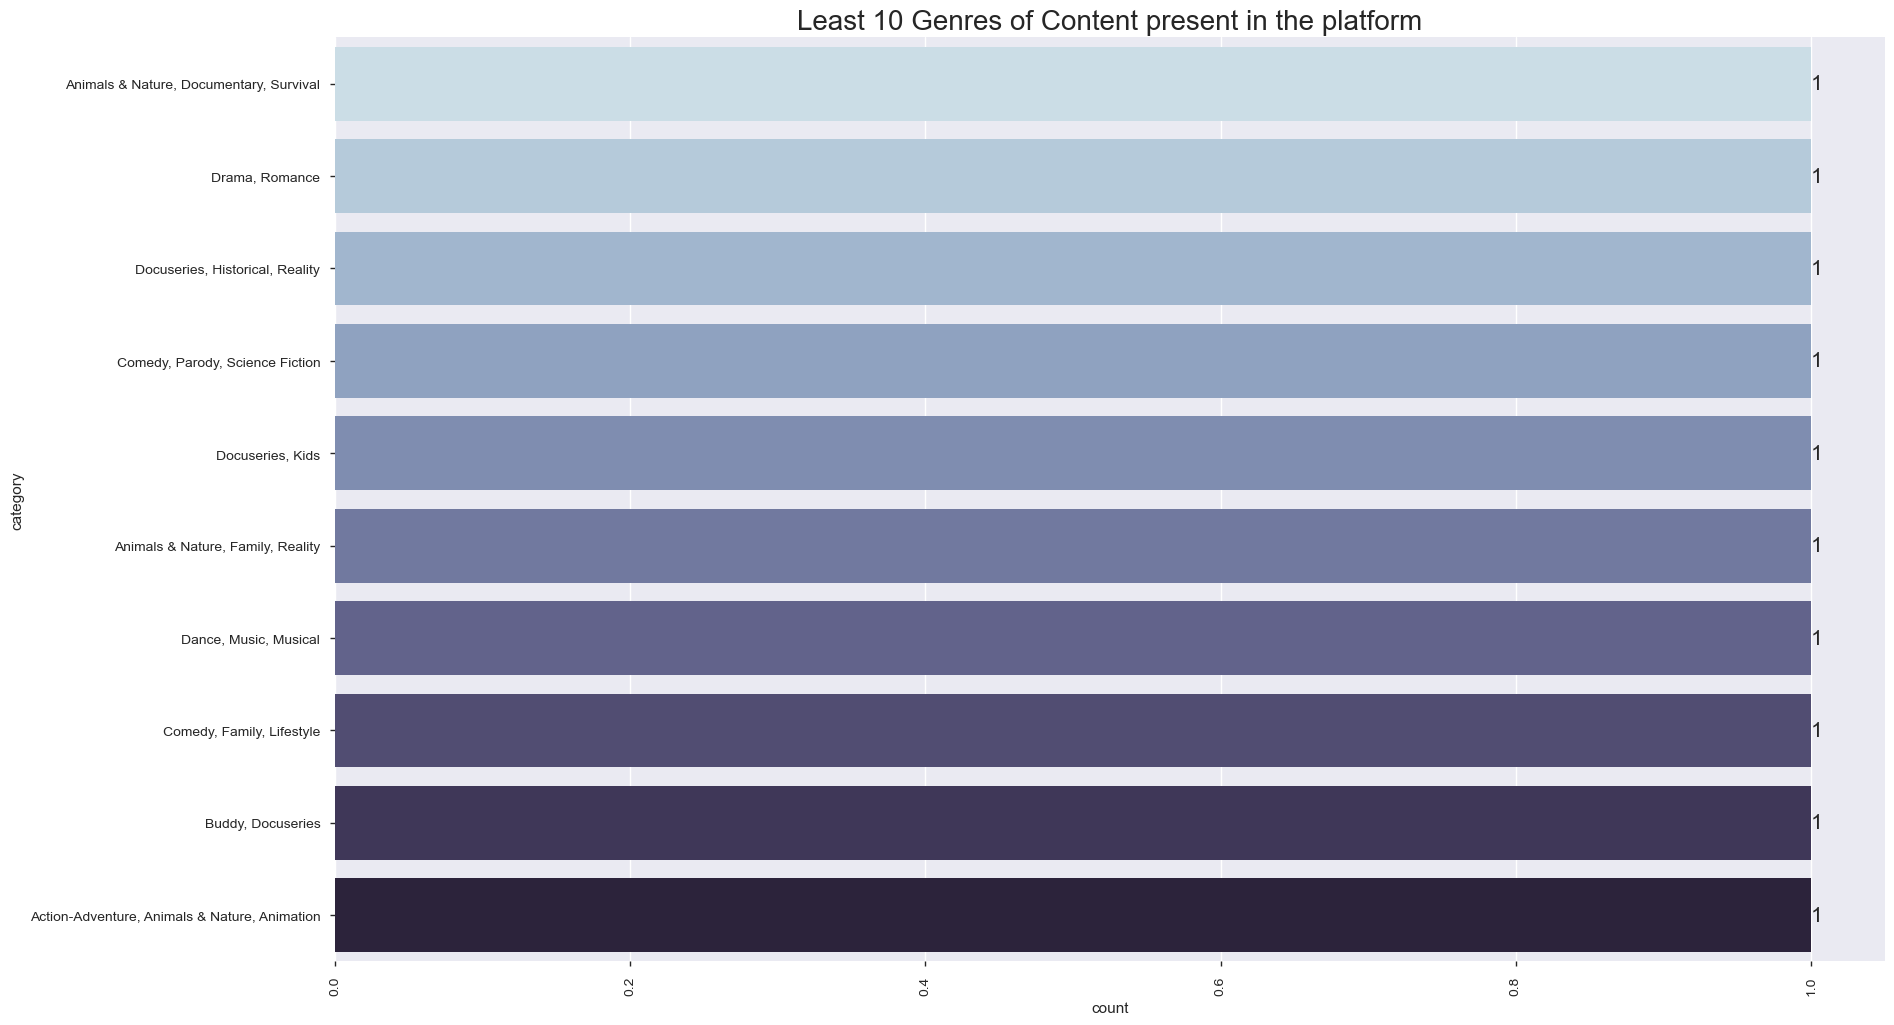

In [217]:
plt.figure(figsize=(20, 12))
plt.title("Least 10 Genres of Content present in the platform",fontsize=20)
c1=sns.countplot(y='category',data=df,palette="ch:s=.25,rot=-.25",order=df.category.value_counts().iloc[-10:].index)
c1.bar_label(c1.containers[0],size = 15)
plt.xticks(rotation=90)
plt.show()

There are 36 types in the Disney Plus Movie Dataset


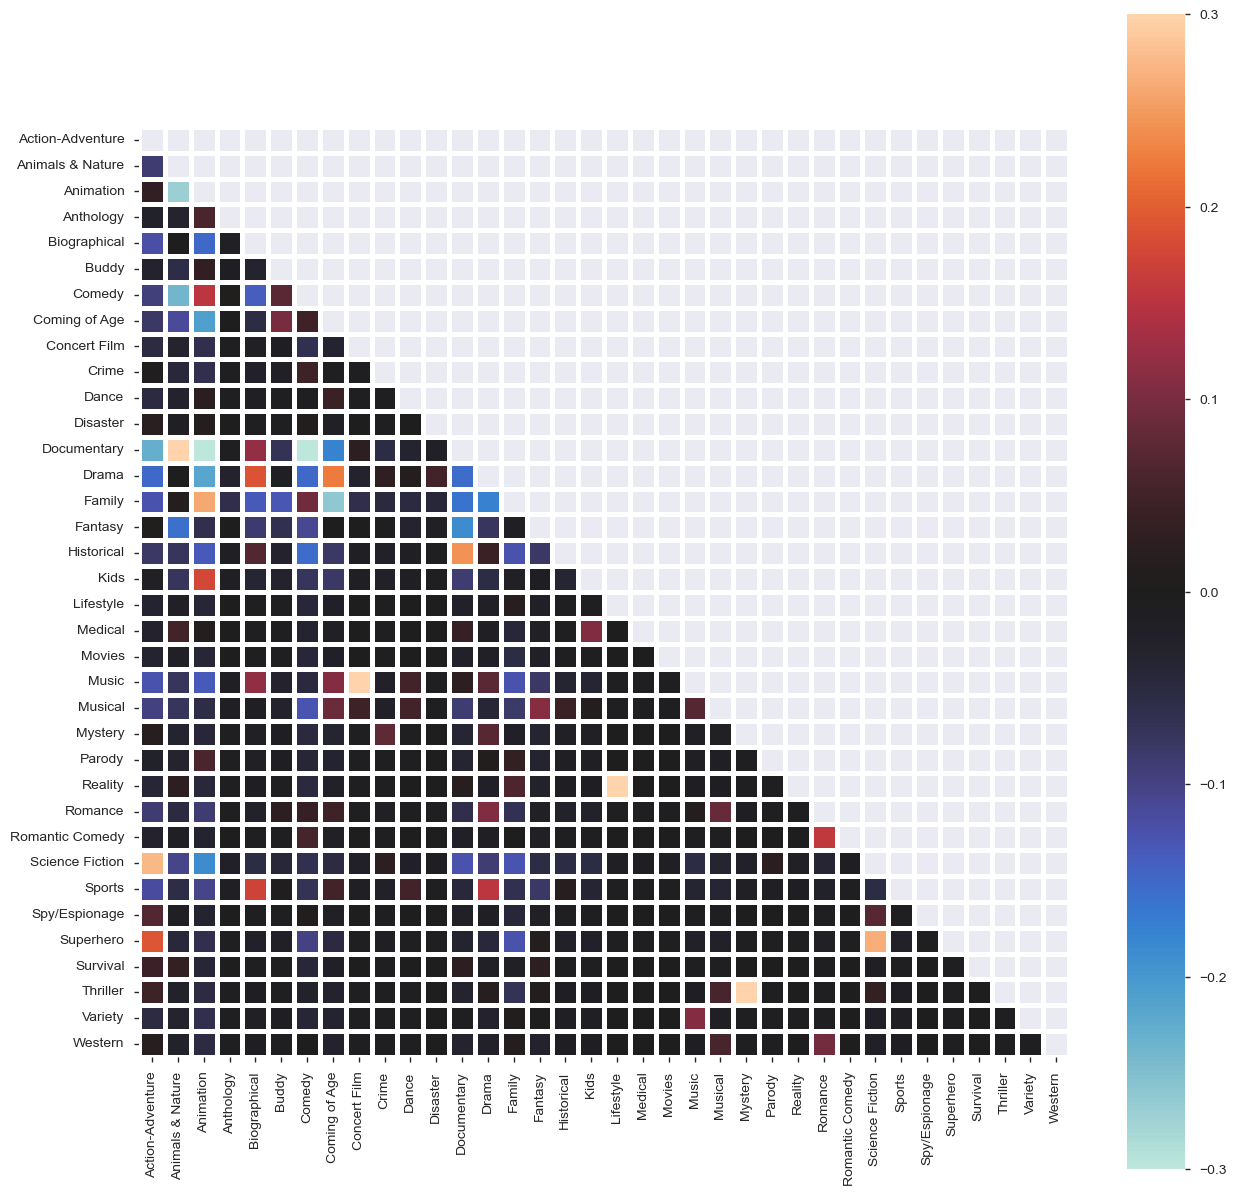

In [218]:
from sklearn.preprocessing import MultiLabelBinarizer
def genre_heatmap(df, title):
    df['genre'] = df['category'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']:
        Types += i
    Types = set(Types)
    print("There are {} types in the Disney Plus {} Dataset".format(len(Types),title))    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(15,15))
    pl = sns.heatmap(corr, mask=mask, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    plt.show()
    
    
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]
genre_heatmap(df_movies, 'Movie')

There are 36 types in the Disney Plus Movie Dataset
From the given plot we can infer that:

Most of the documentary films are mostly about Animals and Nature.
Superhero films are highly associated with Science Fiction.
Science fiction and Action-Adventure films are closely related.

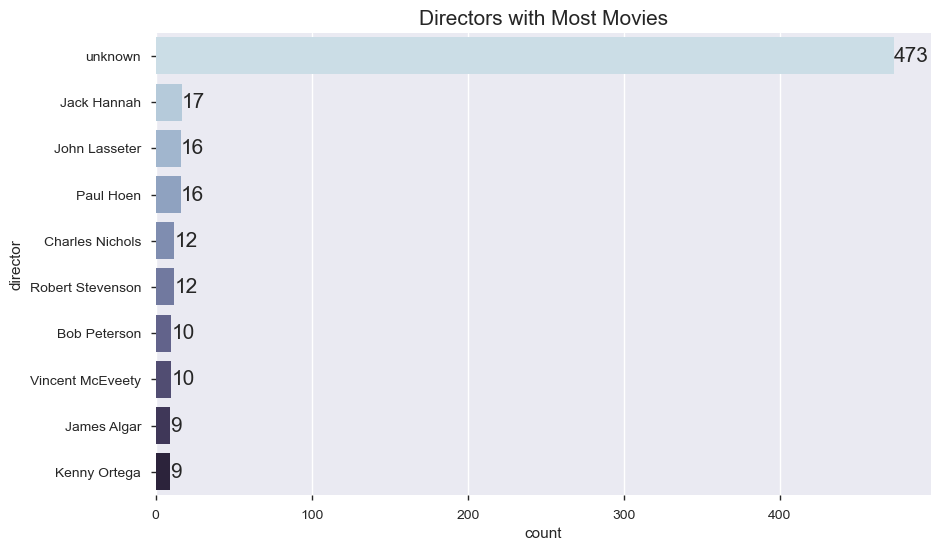

In [219]:
plt.figure(figsize=(10,6))
plt.title("Directors with Most Movies", size=15)
c1=sns.countplot(y='director',data=df,palette="ch:s=.25,rot=-.25",order=df.director.value_counts().iloc[:10].index)
c1.bar_label(c1.containers[0],size = 15)
plt.show()

Jack Hannah famous for his animation films is the director with 17 movies in the platform followed by John Lasseter and Paul Hoen with 16 respectively.

In [220]:
df_tv['season'] = df.apply(lambda x : x['duration'].split(" ")[0] if "min" not in x['duration'] else "0", axis = 1)
df_movies['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "min" in x['duration'] else "0", axis = 1)
df_movies["duration"] = df_movies["duration"].astype("int64")
df_tv["season"] = df_tv["season"].astype("int64")

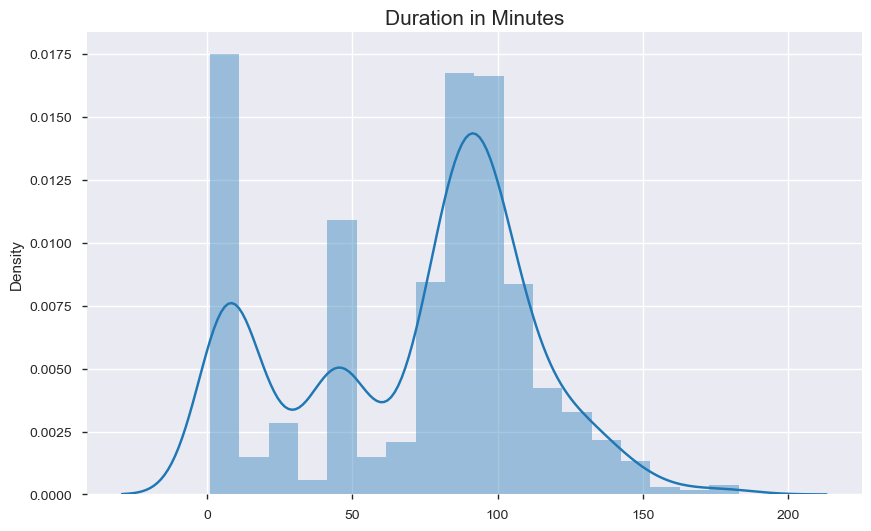

In [222]:
plt.figure(figsize=(10,6))
sns.distplot(x=df_movies[df_movies["duration"]>0]["duration"])
plt.title("Duration in Minutes", size=15)
plt.show()

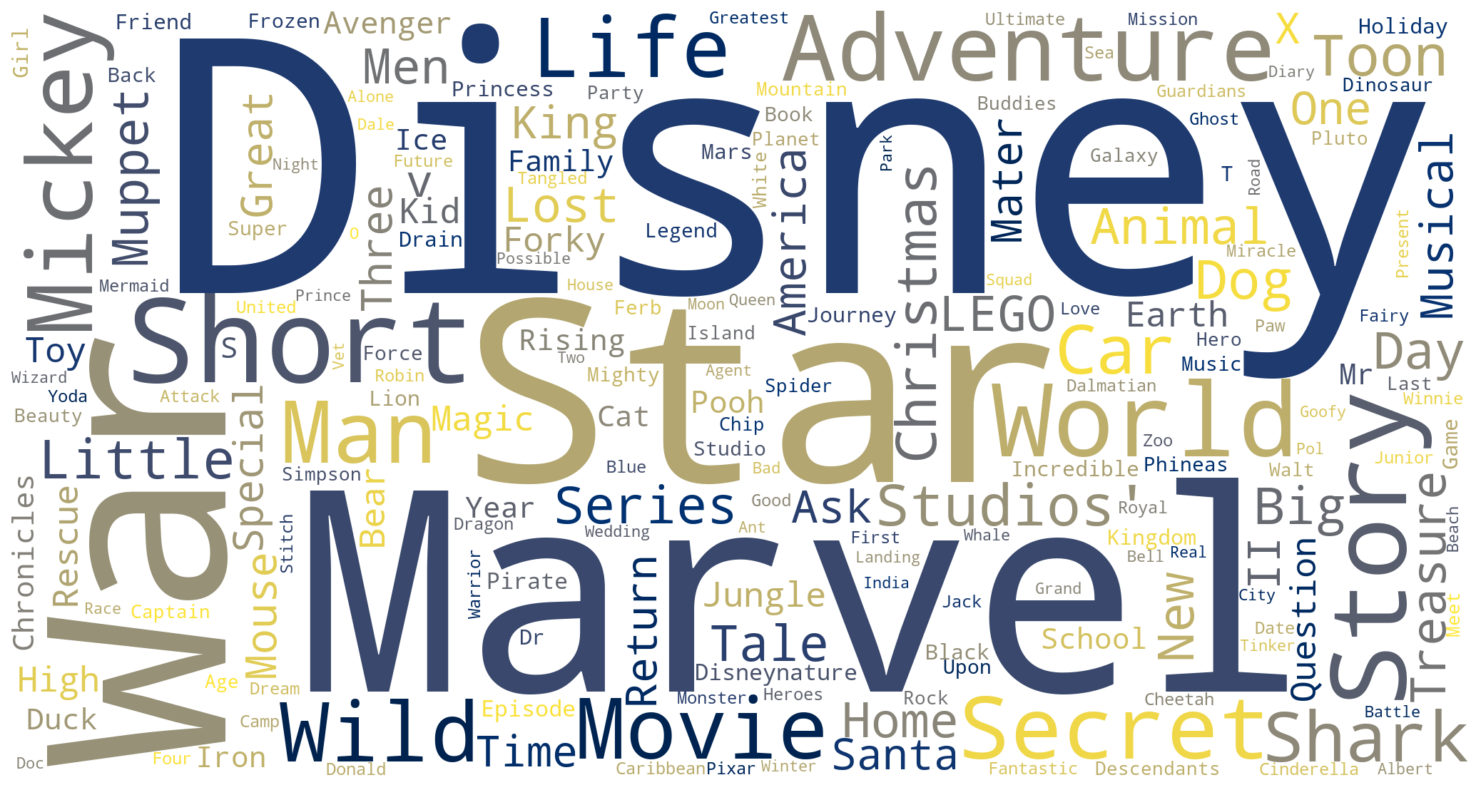

In [224]:
txt1 = " ".join(title for title in df.title)
word_cloud1 = WordCloud(collocations = False, background_color = 'white',width = 2048, height = 1080,colormap='cividis').generate(txt1)
plt.figure(figsize=(30,10))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [225]:
Profile_report = pp.ProfileReport(df,title='Disney data')
Profile_report.to_notebook_iframe()